<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071

Felipe Asbún - 202010509-K

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

# Estadística Descriptiva

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing['target'].value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: target, Length: 3842, dtype: int64

# Visualización

Distribución de los datos:



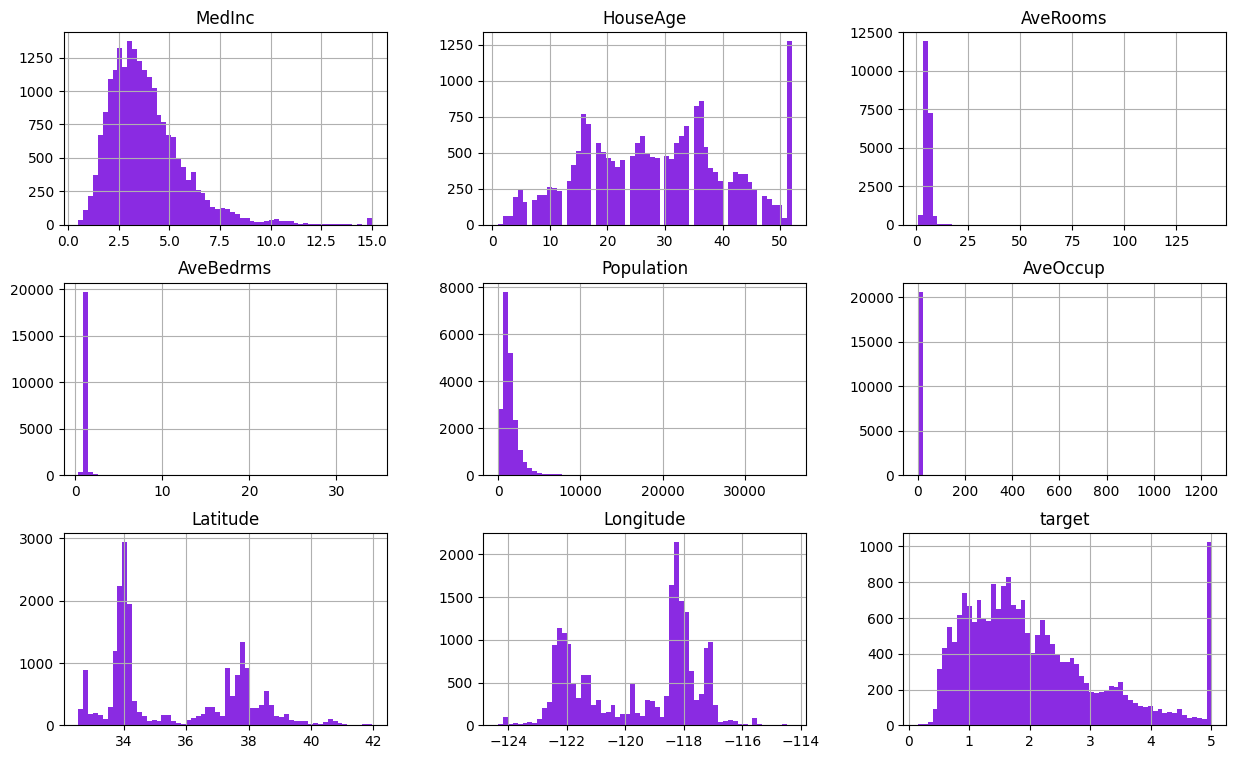

In [ ]:
# Visualización de la distribución de los datos
print('Distribución de los datos:\n')
housing.hist(bins=60, figsize=(15,9), color='blueviolet')
plt.show()

De estos gráficos podemos observar comportamientos atípicos en las distribuciones de los datos, como
- En AveRooms, AveBedrms, Populatoin y AveOccup hay outliers, pues el gráfico presenta una gran densidad de datos concentrada a un lado del gráfico.
- Tanto en HouseAge como en target se observa un pico de densidad al final de la distribución.

Por esto, eliminaremos los outliers eliminando datos atípicos, que consideraremos a más de 2 desviaciones estándar de la media.

# Preprocesamiento

In [ ]:
# Eliminando outliers
data = housing
n_total = data.shape[0]
for col in data.columns:
    if col != 'target':
        mean = data[col].mean()
        std = data[col].std()
        data = data[np.absolute(data[col] - mean) < 2*std].reset_index().drop(columns='index')
print('Porcentaje de datos eliminados: ', (1-data.shape[0]/housing.shape[0])*100, '%')

Porcentaje de datos eliminados:  15.809108527131787 %


Distribución de los datos después de eliminar outiliers:



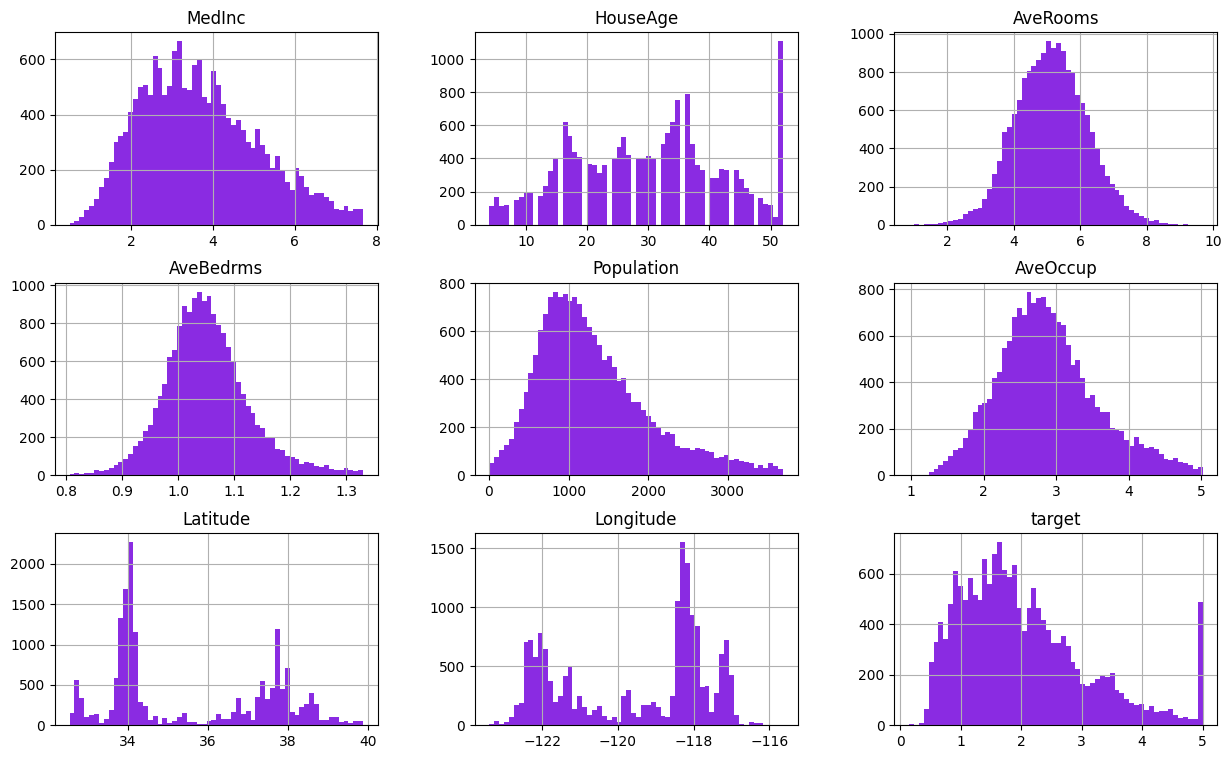

In [ ]:
print('Distribución de los datos después de eliminar outiliers:\n')
data.hist(bins=60, figsize=(15,9), color='blueviolet')
plt.show()

# Entrenamiento de modelos

Compararemos 4 modelos:
- Regresión Lineal
- Regresión por Support Vector Machines (kernel lineal)
- Regresión por K-Vecinos Cercanos
- Regresión por Árboles de Decisión



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time

In [ ]:
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Regresion Lineal
start = time.time()
LR = LinearRegression()
LR.fit(X_train, y_train)
end = time.time()
t_LR = end-start

df_LR = pd.DataFrame({'y': y_test, 'yhat': LR.predict(X_test)})



In [ ]:
# Support Vector Machine
start = time.time()
SVM = svm.SVR(kernel='linear')
SVM.fit(X_train, y_train)
end = time.time()
t_SVM = end-start

df_SVM = pd.DataFrame({'y': y_test, 'yhat': SVM.predict(X_test)})



In [ ]:
# KNearest
start = time.time()
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
end = time.time()
t_KNR = end-start

df_KNR = pd.DataFrame({'y': y_test, 'yhat': KNR.predict(X_test)})



In [ ]:
# Arbol de decisión
start = time.time()
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, y_train)
end = time.time()
t_DTree = end-start

df_DTree = pd.DataFrame({'y': y_test, 'yhat': DTree.predict(X_test)})

#  Métricas y selección de modelos

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def metricas(model, df, t):
    df_result = regression_metrics(df).join(pd.DataFrame({'execution_time': t}, index=[0]), how='left')
    display(df_result)

In [ ]:
print('Métricas: ')

print('\nRegresion Lineal: ')
metricas(LR, df_LR, t_LR)

print('\nSVM: ')
metricas(SVM, df_SVM, t_SVM)

print('\nKNearestRegression: ')
metricas(KNR, df_KNR, t_KNR)

print('\nÁrbol de decisión: ')
metricas(DTree, df_DTree , t_DTree)

Métricas: 

Regresion Lineal: 


,mae,mse,rmse,mape,smape,ex_time
0,0.4748,0.412,0.6419,28.8053,0.4473,0.057369



SVM: 


,mae,mse,rmse,mape,smape,ex_time
0,0.4628,0.4247,0.6517,26.3122,0.4166,24.611041



KNearestRegression: 


,mae,mse,rmse,mape,smape,ex_time
0,0.4362,0.3891,0.6238,24.685,0.396,0.014823



Árbol de decisión: 


,mae,mse,rmse,mape,smape,ex_time
0,0.4458,0.4751,0.6893,23.6212,0.3822,0.136555


Con estos resultados, vemos que el modelo con mejor rendimiento respecto al MAE y MSE es KNearestRegression, y quien consigue mejor rendimiento respecto a MAPE es el Árbol de Decisión.

